In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("dark")

In [2]:
with open("3D-5-seconds.json") as json_data:
    five_seconds = json.load(json_data)
    json_data.close()

In [3]:
five_seconds[0].keys()

dict_keys(['Algorithm', 'Map Names', 'Results', 'Success Rate'])

In [4]:
def report(algo_data):
    output = ""
    output += f"Name: {algo_data['Algorithm']}\n"
    output += f"Success Rate: {algo_data['Success Rate']}"
    
    return output

In [5]:
summary = report(five_seconds[2])
print(summary)

Name: SRRT-Edge: 5
Success Rate: 0.9228571428571428


In [6]:
df_list = []

for entry in five_seconds:
    algorithm_name = entry["Algorithm"]
    map_names = entry["Map Names"]
    results = entry["Results"]

    df = pd.DataFrame(results)
    
    df["map_name"] = map_names
    
    df.set_index("map_name", inplace=True)

    df.columns = [f"{algorithm_name}_{col}" for col in df.columns]
    
    df_list.append(df)

final_df = pd.concat(df_list, axis=1)

final_df

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,...,RRT-Edge: 5_memory_used,RRT-Edge: 5_replan_time,Informed RRT*: 5_path,Informed RRT*: 5_path_len,Informed RRT*: 5_energy,Informed RRT*: 5_compute_time,Informed RRT*: 5_traversal_time,Informed RRT*: 5_cpu_usage,Informed RRT*: 5_memory_used,Informed RRT*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_93_3d,None,None,None,5.301677,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1195723,[],"[[52, 68, 34], [52, 68, 34], [54.2188007849009...",42.000000,...,421879,[],"[[52, 68, 34], [52.24703156805448, 72.16514769...",59.492790,90486.409835,5.007087,0.025446,"[95.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",465230,[]
block_19_3d,None,None,None,5.226784,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1030947,[],"[[95, 75, 42], [92.01165052944948, 70.14393211...",66.000000,...,402559,[],"[[95, 75, 42], [89.57098044912979, 76.82319780...",96.578713,119345.808927,5.008154,0.039600,"[89.5, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0,...",417474,[]
house_75_3d,None,None,None,10.206960,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",618215,[],None,NaN,...,579657,[],"[[13, 24, 16], [10.078179037084848, 18.7646764...",78.394037,151905.561753,5.016767,0.028122,"[100.0, 88.9, 92.9, 100.0, 100.0, 100.0, 100.0...",498229,[]
block_96_3d,None,None,None,5.022228,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",963379,[],"[[37, 1, 44], [41.88240082724041, 4.4874291623...",60.000000,...,502815,"[5.018110275268555, 5.007156610488892]","[[37, 1, 44], [38.0797837364275, 6.85004771756...",156.567188,253441.899090,5.001899,55.118671,"[93.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",474582,"[5.001116991043091, 5.000709533691406, 5.00084..."
house_80_3d,None,None,None,9.619725,None,"[100.0, 76.9, 32.1, 100.0, 100.0, 100.0, 100.0...",614911,[],None,NaN,...,525135,[],"[[23, 5, 16], [17.946192930063102, 6.995756807...",22.163246,42018.901240,5.004173,0.008508,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",538048,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_30_3d,None,None,None,18.158664,None,"[80.0, 100.0, 100.0, 100.0, 4.7, 100.0, 100.0,...",801080,[],None,NaN,...,509496,[],"[[12, 5, 14], [12.789370042807487, 8.740716665...",14.501264,23090.599732,5.082019,0.015767,"[100.0, 64.0, 100.0, 100.0, 100.0, 100.0, 100....",486022,[]
block_150_3d,None,None,None,5.086119,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1790164,[],"[[97, 12, 37], [97, 12, 37], [97.0, 17.8834840...",62.248225,...,259102,[],"[[97, 12, 37], [91.33319971711396, 12.72070176...",79.382547,99905.899264,5.129158,0.056492,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",332966,[]
block_227_3d,None,None,None,5.267761,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1438900,[],"[[78, 51, 34], [76, 51, 34], [71.389901080433,...",87.095285,...,291438,[],"[[78, 51, 34], [72.9498752445854, 51.976047597...",104.856053,140571.308816,5.017043,0.037693,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",333214,[]


# 

# SRRT-Edge

### Where did it fail?

In [7]:
check_col = "SRRT-Edge: 5_path"

filtered_df = final_df[final_df[check_col].isna()]

rrt_star_path = "Informed RRT*: 5_path"
rrt_edge_path = "RRT-Edge: 5_path"

filtered_df

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,...,RRT-Edge: 5_memory_used,RRT-Edge: 5_replan_time,Informed RRT*: 5_path,Informed RRT*: 5_path_len,Informed RRT*: 5_energy,Informed RRT*: 5_compute_time,Informed RRT*: 5_traversal_time,Informed RRT*: 5_cpu_usage,Informed RRT*: 5_memory_used,Informed RRT*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_96_3d,None,None,None,5.022228,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",963379,[],"[[37, 1, 44], [41.88240082724041, 4.4874291623...",60.0,...,502815,"[5.018110275268555, 5.007156610488892]","[[37, 1, 44], [38.0797837364275, 6.85004771756...",156.567188,253441.899090,5.001899,55.118671,"[93.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",474582,"[5.001116991043091, 5.000709533691406, 5.00084..."
house_73_3d,None,None,None,14.854151,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",772679,[],None,NaN,...,525143,[],"[[23, 24, 22], [17.93658247507123, 24.18055623...",20.000000,28494.063455,5.001830,0.007076,"[100.0, 100.0, 28.6, 100.0, 100.0, 100.0, 100....",497783,[]
house_67_3d,None,None,None,5.995305,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 85.7, 100....",590412,[],None,NaN,...,524744,[],"[[16, 17, 21], [17.97368070895004, 21.57170589...",14.232629,59903.126756,5.008401,0.009442,"[66.7, 93.3, 100.0, 100.0, 100.0, 100.0, 100.0...",465895,[]
block_99_3d,None,None,None,5.049922,None,"[100.0, 100.0, 79.2, 100.0, 40.0, 83.3, 100.0,...",1672788,[],None,NaN,...,71590,[],None,NaN,NaN,5.001178,NaN,"[50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 85.7...",125355,[]
block_87_3d,None,None,None,5.011395,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",2389032,[],None,NaN,...,373187,[5.0183327198028564],"[[94, 92, 85], [89.92740459660327, 87.91079110...",190.000000,213334.289377,5.004544,0.093425,"[100.0, 100.0, 62.5, 100.0, 75.0, 100.0, 100.0...",311968,[]
block_72_3d,None,None,None,5.307601,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1665600,[],None,NaN,...,308198,[],"[[61, 40, 25], [64.07448825551695, 41.60563351...",117.563255,142891.661512,5.001043,0.036226,"[100.0, 100.0, 100.0, 100.0, 83.3, 100.0, 100....",317374,[]
block_183_3d,None,None,None,5.128254,None,"[100.0, 100.0, 1.6, 2.9, 87.5, 100.0, 100.0, 1...",1437892,[],None,NaN,...,115334,[],None,NaN,NaN,5.000050,NaN,"[0.0, 100.0, 100.0, 100.0, 100.0, 100.0, 85.7,...",161702,[]
house_48_3d,None,None,None,6.444444,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 93.3, 100....",615160,[],None,NaN,...,545824,[],"[[24, 24, 22], [23.151114478640093, 18.5116825...",53.425620,88354.504261,5.011825,0.017645,"[83.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",495623,[]
block_105_3d,None,None,None,5.041976,None,"[52.6, 100.0, 100.0, 100.0, 88.9, 100.0, 100.0...",1501524,[],None,NaN,...,67846,[],None,NaN,NaN,5.000129,NaN,"[85.7, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",144742,[]


In [8]:
# Where RRT-Edge found it

non_nan_rrt_edge = filtered_df[rrt_edge_path].notna().sum()
non_nan_informed = filtered_df[rrt_star_path].notna().sum()

total_count = filtered_df.shape[0]

edge_percent = (non_nan_rrt_edge / total_count)
informed_percent = (non_nan_informed / total_count)

print(f"Edge percent: {edge_percent} informed percent: {informed_percent}")

Edge percent: 0.37037037037037035 informed percent: 0.5555555555555556


Did any fail during traversal?

In [9]:
filtered_df["SRRT-Edge: 5_replan_time"]

map_name
block_96_3d     [5.015033006668091, 5.0305469036102295, 5.0170...
house_73_3d                                                    []
house_67_3d      [0.00014662742614746094, 0.00011014938354492188]
block_99_3d                                                    []
block_87_3d                                                    []
block_72_3d                                                    []
block_183_3d                                                   []
house_48_3d                                                    []
block_105_3d                                                   []
block_141_3d                                                   []
block_24_3d                                                    []
block_195_3d    [8.130073547363281e-05, 7.390975952148438e-05,...
block_164_3d                                                   []
block_111_3d                                                   []
house_21_3d                                                    []
b

Path length comparison

In [10]:
check_col = "SRRT-Edge: 5_path"
check_col2 = "RRT-Edge: 5_path"
check_col3 = "Informed RRT*: 5_path"

columns = [check_col, check_col2, check_col3]

filtered_sampling_based = final_df.dropna(subset=columns)
filtered_sampling_based

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,...,RRT-Edge: 5_memory_used,RRT-Edge: 5_replan_time,Informed RRT*: 5_path,Informed RRT*: 5_path_len,Informed RRT*: 5_energy,Informed RRT*: 5_compute_time,Informed RRT*: 5_traversal_time,Informed RRT*: 5_cpu_usage,Informed RRT*: 5_memory_used,Informed RRT*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_93_3d,None,None,None,5.301677,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1195723,[],"[[52, 68, 34], [52, 68, 34], [54.2188007849009...",42.000000,...,421879,[],"[[52, 68, 34], [52.24703156805448, 72.16514769...",59.492790,90486.409835,5.007087,0.025446,"[95.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",465230,[]
block_19_3d,None,None,None,5.226784,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1030947,[],"[[95, 75, 42], [92.01165052944948, 70.14393211...",66.000000,...,402559,[],"[[95, 75, 42], [89.57098044912979, 76.82319780...",96.578713,119345.808927,5.008154,0.039600,"[89.5, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0,...",417474,[]
house_75_3d,None,None,None,10.206960,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",618215,[],None,NaN,...,579657,[],"[[13, 24, 16], [10.078179037084848, 18.7646764...",78.394037,151905.561753,5.016767,0.028122,"[100.0, 88.9, 92.9, 100.0, 100.0, 100.0, 100.0...",498229,[]
house_80_3d,None,None,None,9.619725,None,"[100.0, 76.9, 32.1, 100.0, 100.0, 100.0, 100.0...",614911,[],None,NaN,...,525135,[],"[[23, 5, 16], [17.946192930063102, 6.995756807...",22.163246,42018.901240,5.004173,0.008508,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",538048,[]
block_181_3d,None,None,None,5.184020,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1193347,[],"[[6, 82, 34], [6, 82, 34], [7.706563667303918,...",101.483638,...,319317,[],"[[6, 82, 34], [8.038171655494727, 79.424971856...",207.824026,287732.429950,5.002738,0.084391,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",313931,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
block_235_3d,None,None,None,5.217823,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1575483,[],"[[61, 91, 29], [61, 91, 29], [66.4701076700626...",44.498422,...,288350,[],"[[61, 91, 29], [61.143829699917525, 85.2438100...",80.000000,101549.065170,5.001526,0.024283,"[100.0, 72.4, 100.0, 100.0, 100.0, 100.0, 100....",341114,[]
house_55_3d,None,None,None,9.059664,None,"[100.0, 85.7, 77.8, 28.6, 23.1, 80.0, 100.0, 1...",700768,[],None,NaN,...,509976,[],"[[10, 27, 15], [6.392803926660519, 22.30017179...",38.839444,91834.909669,5.012164,0.014025,"[100.0, 100.0, 100.0, 100.0, 63.6, 100.0, 100....",448408,[]
block_234_3d,None,None,None,5.098645,None,"[23.1, 85.7, 100.0, 100.0, 29.5, 100.0, 100.0,...",1506076,[],"[[10, 35, 86], [10, 35, 78], [7.74226991587936...",80.000000,...,306779,[],"[[10, 35, 86], [14.750268148820641, 35.1178567...",125.918349,187453.354148,5.008339,0.066996,"[100.0, 100.0, 100.0, 100.0, 85.7, 100.0, 100....",327894,[]


In [11]:
srrt_edge_len = filtered_sampling_based["SRRT-Edge: 5_path_len"]
rrt_edge_len = filtered_sampling_based["RRT-Edge: 5_path_len"]
informed_rrt_len = filtered_sampling_based["Informed RRT*: 5_path_len"]

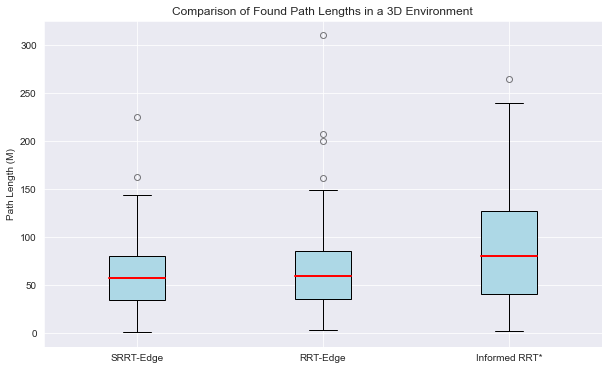

In [12]:
data = [srrt_edge_len, rrt_edge_len, informed_rrt_len]
labels = ["SRRT-Edge", "RRT-Edge", "Informed RRT*"]

plt.figure(figsize=(10, 6))

boxprops = dict(facecolor='lightblue', color='black')
whiskerprops = dict(color='black')
capprops = dict(color='black')
medianprops = dict(color='red', linewidth=2)
flierprops = dict(marker='o', color='yellow', alpha=0.5)

plt.boxplot(data, labels=labels, 
            boxprops=boxprops, 
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops,
            flierprops=flierprops,
            patch_artist=True)

plt.title('Comparison of Found Path Lengths in a 3D Environment')
plt.ylabel('Path Length (M)')
plt.grid(True)
plt.show()

In [13]:
srrt_edge_range = srrt_edge_len.max() - srrt_edge_len.min()
rrt_edge_range = rrt_edge_len.max() - rrt_edge_len.min()

print(srrt_edge_range)
print(rrt_edge_range)

223.91268312130262
307.0851218268662


Memory Usage

In [14]:
srrt_edge_memory = filtered_sampling_based["SRRT-Edge: 5_memory_used"]
rrt_edge_memory = filtered_sampling_based["RRT-Edge: 5_memory_used"]
informed_rrt_memory = filtered_sampling_based["Informed RRT*: 5_memory_used"]

In [15]:
informed_rrt_memory.median()

341687.0

In [16]:
rrt_edge_memory.median()

311126.0

In [17]:
srrt_edge_memory.median()

582712.0

### 1 Second

In [18]:
with open("3D-1-seconds.json") as json_data:
    one_second = json.load(json_data)
    json_data.close()

In [19]:
one_second[3]["Success Rate"]

0.7914285714285715

In [20]:
df_list = []

for entry in one_second:
    algorithm_name = entry["Algorithm"]
    map_names = entry["Map Names"]
    results = entry["Results"]

    df = pd.DataFrame(results)
    
    df["map_name"] = map_names
    
    df.set_index("map_name", inplace=True)

    df.columns = [f"{algorithm_name}_{col}" for col in df.columns]
    
    df_list.append(df)

one_second_final_df = pd.concat(df_list, axis=1)

one_second_final_df

,Adaptive A*: 1_path,Adaptive A*: 1_path_len,Adaptive A*: 1_energy,Adaptive A*: 1_compute_time,Adaptive A*: 1_traversal_time,Adaptive A*: 1_cpu_usage,Adaptive A*: 1_memory_used,Adaptive A*: 1_replan_time,SRRT-Edge: 1_path,SRRT-Edge: 1_path_len,...,RRT-Edge: 1_memory_used,RRT-Edge: 1_replan_time,Informed RRT*: 1_path,Informed RRT*: 1_path_len,Informed RRT*: 1_energy,Informed RRT*: 1_compute_time,Informed RRT*: 1_traversal_time,Informed RRT*: 1_cpu_usage,Informed RRT*: 1_memory_used,Informed RRT*: 1_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_93_3d,"[[52, 68, 34], [52, 68, 34], [54.2188007849009...",42.0,36153.142342,0.364010,1.175097,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",128832,[],"[[52, 68, 34], [52.3, 69.0, 37.2], [52.6519900...",27.366007,...,232214,[],"[[52, 68, 34], [54.668226487280016, 69.9555891...",39.390154,52664.332382,1.004854,0.013573,"[15.7, 100.0, 100.0, 85.7, 18.2]",181374,[]
block_19_3d,"[[95, 75, 42], [92.01165052944948, 70.14393211...",66.0,48585.477643,0.183071,1.764488,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",123167,[],"[[95, 75, 42], [95.1792642853418, 69.084278583...",66.694027,...,230654,[],"[[95, 75, 42], [90.55776719218309, 71.09113648...",84.937703,113850.416048,1.001826,0.023975,"[17.3, 100.0, 100.0, 80.0, 88.9, 37.5]",191553,[]
house_75_3d,None,NaN,NaN,0.030362,0.000000,"[100.0, 64.3]",431215,[],"[[13, 24, 16], [10.967785465145697, 24.4011194...",52.404523,...,445588,[],None,NaN,NaN,1.003431,NaN,"[100.0, 10.4, 100.0, 83.3, 50.0]",469578,[]
block_96_3d,None,NaN,NaN,1.077453,0.000000,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",216833,[],None,NaN,...,255678,"[1.0083532333374023, 1.0074653625488281]","[[37, 1, 44], [35.48061520693472, 5.7954564153...",100.000000,131199.989624,1.000624,0.030915,"[28.3, 83.3, 32.0]",188442,[]
house_80_3d,None,NaN,NaN,0.037087,0.000000,"[100.0, 50.0]",416143,[],"[[23, 5, 16], [21.262341650095575, 8.583750555...",25.261454,...,439663,[],None,NaN,NaN,1.006333,NaN,"[30.3, 100.0, 100.0, 100.0, 100.0, 0.0, 35.7]",433407,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_30_3d,None,NaN,NaN,1.027574,0.000000,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 90....",480899,[],None,NaN,...,448632,[],None,NaN,NaN,1.005770,NaN,"[100.0, 60.0, 100.0, 100.0, 100.0, 100.0]",463984,[]
block_150_3d,None,NaN,NaN,1.004052,0.000000,[3.6],177686,[],"[[97, 12, 37], [93.94170960375077, 17.12047301...",61.033675,...,159730,[],"[[97, 12, 37], [94.82536176970463, 17.53939853...",107.885887,164083.780051,1.001912,0.031446,"[100.0, 0.0]",157141,[]
block_227_3d,None,NaN,NaN,1.002006,0.000000,[0.7],162526,[],"[[78, 51, 34], [74.7336646396107, 50.484061868...",75.963719,...,158490,[],"[[78, 51, 34], [74.42613826130555, 48.55458527...",120.000000,149901.089668,1.002290,0.033947,"[100.0, 57.1]",160222,[]


In [21]:
check_col = "SRRT-Edge: 1_path"
check_col2 = "RRT-Edge: 1_path"
check_col3 = "Informed RRT*: 1_path"

columns = [check_col, check_col2, check_col3]

filtered_sampling_based_one = one_second_final_df.dropna(subset=columns)
filtered_sampling_based_one

,Adaptive A*: 1_path,Adaptive A*: 1_path_len,Adaptive A*: 1_energy,Adaptive A*: 1_compute_time,Adaptive A*: 1_traversal_time,Adaptive A*: 1_cpu_usage,Adaptive A*: 1_memory_used,Adaptive A*: 1_replan_time,SRRT-Edge: 1_path,SRRT-Edge: 1_path_len,...,RRT-Edge: 1_memory_used,RRT-Edge: 1_replan_time,Informed RRT*: 1_path,Informed RRT*: 1_path_len,Informed RRT*: 1_energy,Informed RRT*: 1_compute_time,Informed RRT*: 1_traversal_time,Informed RRT*: 1_cpu_usage,Informed RRT*: 1_memory_used,Informed RRT*: 1_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_93_3d,"[[52, 68, 34], [52, 68, 34], [54.2188007849009...",42.000000,36153.142342,0.364010,1.175097,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",128832,[],"[[52, 68, 34], [52.3, 69.0, 37.2], [52.6519900...",27.366007,...,232214,[],"[[52, 68, 34], [54.668226487280016, 69.9555891...",39.390154,52664.332382,1.004854,0.013573,"[15.7, 100.0, 100.0, 85.7, 18.2]",181374,[]
block_19_3d,"[[95, 75, 42], [92.01165052944948, 70.14393211...",66.000000,48585.477643,0.183071,1.764488,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",123167,[],"[[95, 75, 42], [95.1792642853418, 69.084278583...",66.694027,...,230654,[],"[[95, 75, 42], [90.55776719218309, 71.09113648...",84.937703,113850.416048,1.001826,0.023975,"[17.3, 100.0, 100.0, 80.0, 88.9, 37.5]",191553,[]
block_181_3d,None,NaN,NaN,1.004726,0.000000,"[100.0, 100.0, 100.0, 100.0, 66.7]",165315,[],"[[6, 82, 34], [7.671032973490287, 76.778021957...",80.617424,...,173217,[],"[[6, 82, 34], [9.401339303672525, 83.314163184...",126.602484,193159.454926,1.001209,0.035435,"[100.0, 100.0, 100.0, 100.0, 30.8]",168438,[]
block_8_3d,None,NaN,NaN,1.001219,0.000000,"[85.7, 100.0, 100.0, 37.5]",181171,[],"[[84, 80, 24], [79.4631784690692, 76.202613199...",109.322375,...,164817,[],"[[84, 80, 24], [81.22473253717965, 74.75770944...",135.191402,152278.661113,1.000689,0.051401,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 38.5]",174504,[]
house_65_3d,"[[15, 4, 4], [22, 3, 5], [24, 3, 5]]",7.141428,7517.433538,0.770006,1.189852,"[100.0, 100.0, 100.0, 100.0, 80.0, 66.7, 100.0...",417151,[],"[[15, 4, 4], [16.0, 4.0, 4.2], [21.92457158333...",7.019804,...,426839,[],"[[15, 4, 4], [17.850746727859427, 4.8562154511...",17.108495,41637.099407,1.001088,0.006470,"[20.0, 100.0, 100.0, 100.0, 50.0]",430810,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
block_17_3d,None,NaN,NaN,1.008798,0.000000,[0.3],190882,[],"[[87, 50, 36], [87.1, 46.8, 36.0], [87.0798772...",27.201562,...,163630,[],"[[87, 50, 36], [81.16492689529119, 49.12657387...",71.357388,101784.406007,1.001881,0.026763,"[85.7, 57.4, 18.2, 100.0, 57.9]",164572,[]
house_55_3d,None,NaN,NaN,1.034280,0.000000,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",412472,[],"[[10, 27, 15], [9.317111376842071, 26.80173398...",13.500624,...,409560,[],"[[10, 27, 15], [7.160864846919144, 26.31878022...",18.188370,29066.264287,1.002795,0.006740,"[45.2, 52.9, 100.0, 0.0]",409469,[]
block_234_3d,None,NaN,NaN,1.005135,0.000000,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",164026,[],"[[10, 35, 86], [9.74121681957888, 34.477833491...",67.206340,...,169306,[],"[[10, 35, 86], [12.763685919841542, 33.9472697...",85.822467,114222.512346,1.001691,0.039881,"[81.2, 100.0, 100.0]",192290,[]


In [22]:
srrt_edge_len_1 = filtered_sampling_based_one["SRRT-Edge: 1_path_len"]
rrt_edge_len_1 = filtered_sampling_based_one["RRT-Edge: 1_path_len"]
informed_rrt_len_1 = filtered_sampling_based_one["Informed RRT*: 1_path_len"]


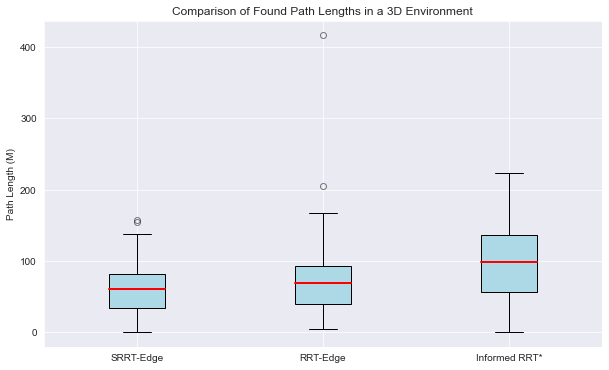

In [26]:
data = [srrt_edge_len_1, rrt_edge_len_1, informed_rrt_len_1]
labels = ["SRRT-Edge", "RRT-Edge", "Informed RRT*"]

plt.figure(figsize=(10, 6))

boxprops = dict(facecolor='lightblue', color='black')
whiskerprops = dict(color='black')
capprops = dict(color='black')
medianprops = dict(color='red', linewidth=2)
flierprops = dict(marker='o', color='yellow', alpha=0.5)

plt.boxplot(data, labels=labels, 
            boxprops=boxprops, 
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops,
            flierprops=flierprops,
            patch_artist=True)

plt.title('Comparison of Found Path Lengths in a 3D Environment')
plt.ylabel('Path Length (M)')
plt.grid(True)
plt.show()

In [ ]:
rrt_edge_len.median() - srrt_edge_len.median()

2.9413847035187146

# Search Based Algorithm

In [ ]:
final_df["Adaptive A*: 5_path_len"]
filtered_search_based_five = final_df.dropna(subset=["Adaptive A*: 5_path"])
filtered_search_based_five

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,...,RRT-Edge: 5_memory_used,RRT-Edge: 5_replan_time,Informed RRT*: 5_path,Informed RRT*: 5_path_len,Informed RRT*: 5_energy,Informed RRT*: 5_compute_time,Informed RRT*: 5_traversal_time,Informed RRT*: 5_cpu_usage,Informed RRT*: 5_memory_used,Informed RRT*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_93_3d,None,None,None,5.301677,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1195723,[],"[[52, 68, 34], [52, 68, 34], [54.2188007849009...",42.000000,...,421879,[],"[[52, 68, 34], [52.24703156805448, 72.16514769...",59.492790,90486.409835,5.007087,0.025446,"[95.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",465230,[]
block_19_3d,None,None,None,5.226784,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1030947,[],"[[95, 75, 42], [92.01165052944948, 70.14393211...",66.000000,...,402559,[],"[[95, 75, 42], [89.57098044912979, 76.82319780...",96.578713,119345.808927,5.008154,0.039600,"[89.5, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0,...",417474,[]
block_96_3d,None,None,None,5.022228,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",963379,[],"[[37, 1, 44], [41.88240082724041, 4.4874291623...",60.000000,...,502815,"[5.018110275268555, 5.007156610488892]","[[37, 1, 44], [38.0797837364275, 6.85004771756...",156.567188,253441.899090,5.001899,55.118671,"[93.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",474582,"[5.001116991043091, 5.000709533691406, 5.00084..."
block_181_3d,None,None,None,5.184020,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1193347,[],"[[6, 82, 34], [6, 82, 34], [7.706563667303918,...",101.483638,...,319317,[],"[[6, 82, 34], [8.038171655494727, 79.424971856...",207.824026,287732.429950,5.002738,0.084391,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",313931,[]
house_65_3d,None,None,None,15.774453,None,"[100.0, 15.4, 100.0, 100.0, 100.0, 100.0, 100....",763847,[],"[[15, 4, 4], [22, 3, 5], [24, 3, 5]]",7.141428,...,561010,[],"[[15, 4, 4], [18.14117562863828, 2.91290153295...",6.473535,29083.428197,5.001252,0.004311,"[83.7, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0...",440557,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
block_17_3d,None,None,None,5.061672,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1574092,[],"[[87, 50, 36], [83.34475380551898, 46.34475380...",34.974646,...,298006,[],"[[87, 50, 36], [87.25967510773968, 44.45703774...",59.759461,73805.857767,5.010445,0.020159,"[46.2, 100.0, 54.5, 85.0, 100.0, 100.0, 100.0,...",337436,[]
block_235_3d,None,None,None,5.217823,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",1575483,[],"[[61, 91, 29], [61, 91, 29], [66.4701076700626...",44.498422,...,288350,[],"[[61, 91, 29], [61.143829699917525, 85.2438100...",80.000000,101549.065170,5.001526,0.024283,"[100.0, 72.4, 100.0, 100.0, 100.0, 100.0, 100....",341114,[]
block_234_3d,None,None,None,5.098645,None,"[23.1, 85.7, 100.0, 100.0, 29.5, 100.0, 100.0,...",1506076,[],"[[10, 35, 86], [10, 35, 78], [7.74226991587936...",80.000000,...,306779,[],"[[10, 35, 86], [14.750268148820641, 35.1178567...",125.918349,187453.354148,5.008339,0.066996,"[100.0, 100.0, 100.0, 100.0, 85.7, 100.0, 100....",327894,[]


In [ ]:
filtered_search_based_five["Adaptive A*: 5_path_len"].median()

54.00000000000001

In [ ]:
filtered_search_based_five["SRRT-Edge: 5_path_len"].median()

47.90959642379067

In [ ]:
filtered_search_based_five["RRT-Edge: 5_path_len"].median()

55.0371719768006

In [ ]:
filtered_search_based_five["Informed RRT*: 5_path_len"].median()

79.08378307666275

In [ ]:
filtered_search_based_five["Adaptive A*: 5_memory_used"].median()

199070.0

In [ ]:
filtered_search_based_five["SRRT-Edge: 5_memory_used"].median()

589095.0

In [ ]:
filtered_search_based_five["RRT-Edge: 5_memory_used"].median()

296742.0

In [ ]:
filtered_search_based_five["D* Lite: 5_memory_used"].median()

1504124.0